# Testing analytics and modelling

For this we will be doing some testinf of different modelling techniques amd seeing whether anything works.

## Data importing

In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
climate = pd.read_csv('clean data/climate_factors.csv', index_col='Unnamed: 0')
socio = pd.read_csv('clean data/socioec_factors.csv', index_col='Unnamed: 0')
wstress = pd.read_csv('clean data/water_stress.csv', index_col='Unnamed: 0')
countries = pd.read_csv('shared_country_codes.csv')
countries = list(countries['0'])

## Checking the clean data

Need to remove the unnecessary countries from the datasets using the shared countries information. And then see what the situation is with the NANs.

In [17]:
climate = climate[climate['Country'].isin(countries)]
climate.isnull().sum().reset_index().rename(columns={'index':'Variables',0:'# NaN'})

,Variables,# NaN
0,Country,0
1,Temperature (°C),0
2,Total Rainfall (mm),0
3,Total internal renewable water resources (IRWR),1
4,Total external renewable water resources (ERWR),0
5,Total renewable water resources,0
6,Dependency ratio,0


Checking which countries are those that have NANs in the columns that have few NANs.

In [18]:
climate = climate.drop(climate.columns[[7]], axis = 1)
climate[climate.isna().any(axis = 1)]

,Country,Temperature (°C),Total Rainfall (mm),Total internal renewable water resources (IRWR),Total external renewable water resources (ERWR),Total renewable water resources,Dependency ratio
172,SYC,27.674428,1690.743767,NaN,0.0,0.0,0.0


In [6]:
socio = socio[socio['Country'].isin(countries)]
socio.isnull().sum().reset_index().rename(columns={'index':'Variables',0:'# NaN'})

,Variables,# NaN
0,Country,0
1,GDP per capita (current US$/inhab),0
2,Human Development Index (HDI) [highest = 1] (-),0
3,Population density (inhab/km2),0
4,Rural population (1000 inhab),0
5,Rural population with access to safe drinking-...,0
6,Total population with access to safe drinking-...,0
7,Urban population (1000 inhab),0
8,Urban population with access to safe drinking-...,0
9,DEC alternative conversion factor (LCU per US$),1


Remove the following columns:
- Official exchange rate (LCU per US$, period av...	
- Prevalence of HIV, total (\% of population ages..
- Total debt service (\% of GNI)

Then, checking which countries are those that have NANs in the columns that have few NANs.

In [20]:
socio = socio.drop(socio.columns[[30, 35, 37]], axis = 1)
socio[socio.isna().any(axis = 1)]

,Country,GDP per capita (current US$/inhab),Human Development Index (HDI) [highest = 1] (-),Population density (inhab/km2),Rural population (1000 inhab),Rural population with access to safe drinking-water (JMP) (%),Total population with access to safe drinking-water (JMP) (%),Urban population (1000 inhab),Urban population with access to safe drinking-water (JMP) (%),DEC alternative conversion factor (LCU per US$),...,"GNI per capita, PPP (current international $)",General government total expenditure (current LCU),"Life expectancy at birth, total (years)","Mortality rate, infant (per 1,000 live births)","PPP conversion factor, GDP (LCU per international $)","PPP conversion factor, private consumption (LCU per international $)",Population aged 25-64 years (thousands),Population growth (annual %),Price level ratio of PPP conversion factor (GDP) to market exchange rate,Total population (thousands)
35,DJI,2891.234525,0.492,40.693922,213.906,64.7,90.0,743.079,97.4,177.70,...,4720.0,1.364250e+11,64.0,54.2,103.542,104.06,417.4,1.66,0.60,913.8
72,KOR,31852.314810,0.904,509.385056,9429.948,87.9,97.6,41552.264,99.7,1113.98,...,37774.0,NaN,82.0,3.0,865.804,977.32,30549.0,0.46,0.78,50771.2
121,SYR,721.520956,0.544,92.319246,8495.489,87.2,90.1,9774.379,92.3,NaN,...,NaN,NaN,70.2,17.8,NaN,NaN,7841.4,-3.60,NaN,18169.6
135,VEN,7756.479109,0.735,32.237798,3778.814,77.9,93.1,28198.251,95.0,6.20,...,NaN,1.752000e+08,72.6,17.6,NaN,NaN,14198.6,0.02,NaN,29831.8
138,YEM,854.926716,0.463,52.720456,18075.808,46.5,54.9,10174.612,72.0,264.48,...,3520.0,1.885474e+12,66.0,43.0,93.630,90.40,9143.0,2.58,0.40,26494.2


Checking which countries are those that have NANs in the columns that have few NANs.

In [12]:
wstress = wstress[wstress['Country'].isin(countries)]
wstress.isnull().sum()

wstress[wstress.isna().any(axis=1)]

,Country,Water stress (MDG),Water use efficiency (SDG),Water stress (SDG)
43,DJI,6.333333,NaN,6.333333
64,GNQ,0.076154,NaN,0.183503
66,GRD,7.050000,NaN,7.050000
104,MDV,15.666667,NaN,15.666667
130,PNG,0.048951,NaN,0.132243
156,SYC,NaN,89.323035,NaN


## Exploring the data

First need to merge the explanatory datasets (climate and socio economic) with the target dataset.


In [42]:
allclimate = pd.merge(climate, wstress, on = 'Country', how = 'outer')
#allclimate = allclimate.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'])
allclimate = allclimate.drop(allclimate[allclimate['Country'] == 'SYC'].index)
allclimate.isna().sum()

Country                                            0
Temperature (°C)                                   0
Total Rainfall (mm)                                0
Total internal renewable water resources (IRWR)    0
Total external renewable water resources (ERWR)    0
Total renewable water resources                    0
Dependency ratio                                   0
Water stress (MDG)                                 0
Water use efficiency (SDG)                         5
Water stress (SDG)                                 0
dtype: int64

In [25]:
cols = list(allclimate.columns)
#cols.remove('Country')
cols

['Country',
 'Temperature (°C)',
 'Total Rainfall (mm)',
 'Total internal renewable water resources (IRWR)',
 'Total external renewable water resources (ERWR)',
 'Total renewable water resources',
 'Dependency ratio',
 'Water stress (MDG)',
 'Water use efficiency (SDG)',
 'Water stress (SDG)']

In [39]:
allsocio = pd.merge(socio, wstress, on = 'Country', how = 'outer')
allsocio = allsocio.drop(allsocio[allsocio['Country'] == 'SYC'].index)
allsocio.isna().sum()

Country                                                                     0
GDP per capita (current US$/inhab)                                          0
Human Development Index (HDI) [highest = 1] (-)                             0
Population density (inhab/km2)                                              0
Rural population (1000 inhab)                                               0
Rural population with access to safe drinking-water (JMP) (%)               0
Total population with access to safe drinking-water (JMP) (%)               0
Urban population (1000 inhab)                                               0
Urban population with access to safe drinking-water (JMP) (%)               0
DEC alternative conversion factor (LCU per US$)                             1
Fertility rate, total (births per woman)                                    0
GDP (constant LCU)                                                          1
GDP (current LCU)                                               

## Exploratory plots

We can plot the explanatory variables against the potential target variables. 

### Climate data plots

In [44]:
cols = list(allclimate.columns)
#cols.remove('Country')
climate_exp_cols = cols
climate_exp_cols.remove('Water stress (MDG)')
climate_exp_cols.remove('Water use efficiency (SDG)')
climate_exp_cols.remove('Water stress (SDG)')
climate_exp_cols.remove('Country')

climate_expl_choice = widgets.Dropdown(
    options=climate_exp_cols,
    value=climate_exp_cols[0],
    description='Value:',
    disabled=False,
)

trgt_cols = ['Water stress (MDG)', 'Water use efficiency (SDG)', 'Water stress (SDG)']

climate_trgt_choice = widgets.Dropdown(
    options = trgt_cols,
    value = trgt_cols[0],
    description = 'Value:',
    disabled = False,
)

climate_log_choice = widgets.Dropdown(
    options = ['None', 'Target', 'Explanatory', 'Both'],
    value = 'None',
    description = 'Selection:',
    disabled = False
)

selection = widgets.Accordion(children=[climate_expl_choice, climate_trgt_choice, climate_log_choice])
selection.set_title(0, 'Explanatory variable')
selection.set_title(1, 'Target variable')
selection.set_title(2, 'Take log of variables')
selection

Accordion(children=(Dropdown(description='Value:', options=('Temperature (°C)', 'Total Rainfall (mm)', 'Total …

Text(0.5, 1.0, 'Climate data exploratory plot')

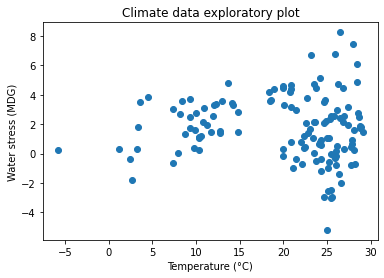

In [50]:
if climate_log_choice.value == 'None':
    plt.scatter(x = allclimate[climate_expl_choice.value], y = (allclimate[climate_trgt_choice.value]))
elif climate_log_choice.value == 'Target':
    plt.scatter(x = allclimate[climate_expl_choice.value], y = np.log(allclimate[climate_trgt_choice.value]))
elif climate_log_choice.value == 'Explanatory':
    plt.scatter(x = np.log(allclimate[climate_expl_choice.value]), y = (allclimate[climate_trgt_choice.value]))
elif climate_log_choice.value == 'Both':
    plt.scatter(x = np.log(allclimate[climate_expl_choice.value]), y = np.log(allclimate[climate_trgt_choice.value]))
plt.xlabel(climate_expl_choice.value)
plt.ylabel(climate_trgt_choice.value)
plt.title('Climate data exploratory plot')

If we play around with the plots we can see that the target variables have a distribution with many small values and a few very large values. If we take the *log()* of the target values the plots look a lot better and much more readable. This is something that we should keep in mind when creating model, especially regression models.

All the water resource explanatory variables suffer from a similar problem of having varied values with many small values and a few very large values.

### Socio economic data plots

In [54]:
cols = list(allsocio.columns)
socio_exp_cols = cols
socio_exp_cols.remove('Water stress (MDG)')
socio_exp_cols.remove('Water use efficiency (SDG)')
socio_exp_cols.remove('Water stress (SDG)')
socio_exp_cols.remove('Country')

socio_expl_choice = widgets.Dropdown(
    options=socio_exp_cols,
    value=socio_exp_cols[0],
    description='Value:',
    disabled=False,
)

socio_trgt_choice = widgets.Dropdown(
    options = trgt_cols,
    value = trgt_cols[0],
    description = 'Value:',
    disabled = False,
)

socio_log_choice = widgets.Dropdown(
    options = ['None', 'Target', 'Explanatory', 'Both'],
    value = 'None',
    description = 'Selection:',
    disabled = False
)

socio_selection = widgets.Accordion(children=[socio_expl_choice, socio_trgt_choice, socio_log_choice])
socio_selection.set_title(0, 'Explanatory variable')
socio_selection.set_title(1, 'Target variable')
socio_selection.set_title(2, 'Take log of variables')
socio_selection

Accordion(children=(Dropdown(description='Value:', options=('GDP per capita (current US$/inhab)', 'Human Devel…

Text(0.5, 1.0, 'Socio economic data exploratory plot')

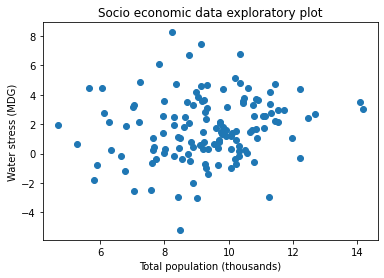

In [60]:
if socio_log_choice.value == 'None':
    plt.scatter(x = allsocio[socio_expl_choice.value], y = (allsocio[socio_trgt_choice.value]))
elif socio_log_choice.value == 'Target':
    plt.scatter(x = allsocio[socio_expl_choice.value], y = np.log(allsocio[socio_trgt_choice.value]))
elif socio_log_choice.value == 'Explanatory':
    plt.scatter(x = np.log(allsocio[socio_expl_choice.value]), y = (allsocio[socio_trgt_choice.value]))
elif socio_log_choice.value == 'Both':
    plt.scatter(x = np.log(allsocio[socio_expl_choice.value]), y = np.log(allsocio[socio_trgt_choice.value]))
plt.xlabel(socio_expl_choice.value)
plt.ylabel(socio_trgt_choice.value)
plt.title('Socio economic data exploratory plot')

## Basic modelling

We will use some basic modelling techniques to whether there are any interesting behaviours in the data. Based on the exploratory plots, it would make sese to use the *log()* values for some of the variables, both explanatory andtarget, for some types of the modelling techniques.

### Compare nests

Create the same number of nests for the climate and socio economic data. See what countries are in the same nests in both.